In [199]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [201]:
df=pd.read_csv("/root/.cache/kagglehub/datasets/abhishek14398/salary-dataset-simple-linear-regression/versions/1/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [202]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [203]:
df.shape

(30, 2)

In [204]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [205]:
X=df["YearsExperience"].values.reshape(-1, 1)
y=df["Salary"].values
print(X)
print(y)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape,X_test.shape)

(21, 1) (9, 1)


In [207]:
model_sklearn = Lasso()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

In [208]:
# R2
r2 = r2_score(y_pred_sklearn,y_test)
# RMSE
RMSE = np.sqrt(mean_squared_error(y_pred_sklearn,y_test,))
#MAE
MAE = mean_absolute_error(y_pred_sklearn,y_test)

print("R2 is ", r2)
print("RMSE is ",RMSE)
print("MAE is ",MAE)

R2 is  0.9065905193027752
RMSE is  6256.270374751106
MAE is  5147.08599726421


In [209]:
class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

In [210]:
model_scratch = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,
                         lambda_parameter=200)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)

In [211]:
# R2
r2 = r2_score(y_pred_scratch,y_test)
# RMSE
RMSE = np.sqrt(mean_squared_error(y_pred_scratch,y_test,))
#MAE
MAE = mean_absolute_error(y_pred_scratch,y_test)

print("R2 is ", r2)
print("RMSE is ",RMSE)
print("MAE is ",MAE)

R2 is  0.9065717575438164
RMSE is  6256.734263579657
MAE is  5147.680449749505


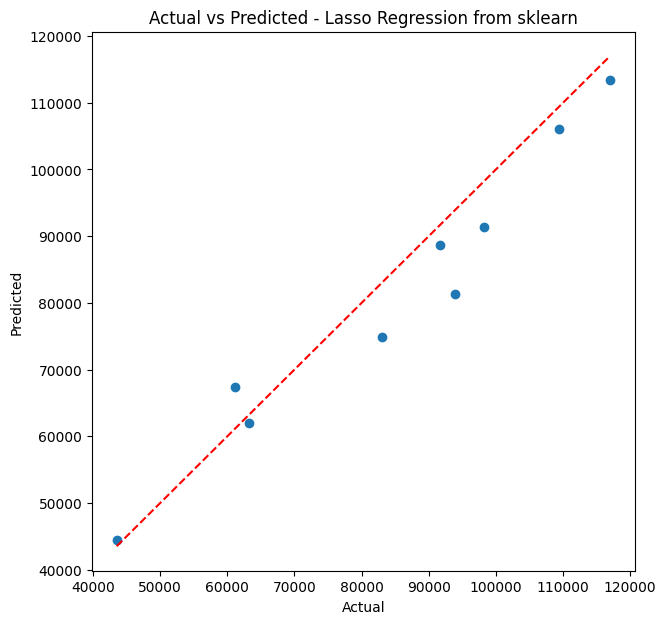

In [212]:
#Plotting
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_sklearn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Lasso Regression from sklearn")
plt.show()

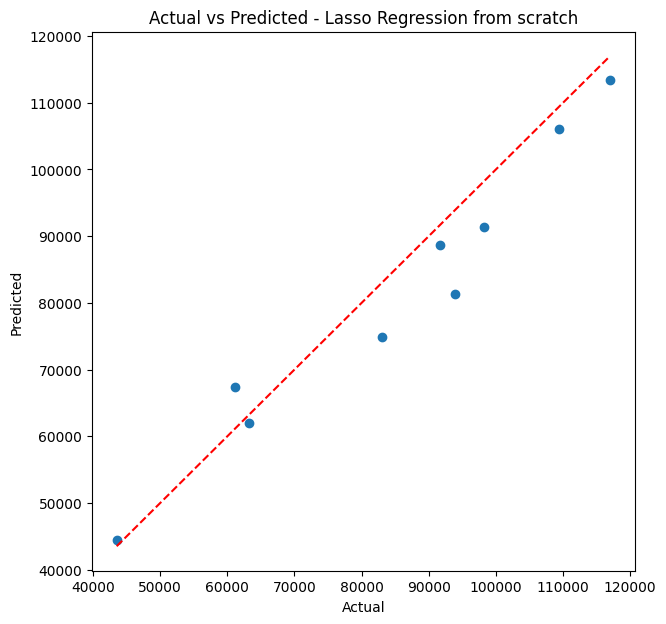

In [213]:
#Plotting
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_scratch)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Lasso Regression from scratch")
plt.show()